# Practical exemple: COVID Dataset
Based on the work of Guillaume Saint-Cirgue from Machine Learnia
## Import the relevant libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

## Load the dataset

In [2]:
path = 'C://Users//foucardguimax//Desktop//PortFolio//Dataset.xlsx'
raw_data = pd.read_excel(path)
df = raw_data.copy()

In [3]:
pd.set_option('display.max_row', df.shape[1])
pd.set_option('display.max_columns', df.shape[1])

## Exploration of the dataset

#### Shape analysis of the dataset:
- **target variable**: SARS-Cov-2 exam result
- **general shape**:(5644, 111) there are a lot of columns in this dataset.
- **types of variables**: float64: 70 ;object: 37 ; int64 : 4
- **NaN values**: A lot of NaN. thecolumns with 76% of missing values comes from viral testing while the columns with 89% of missing values comes from blood testing.

#### Background analysis:
- **Target visualisation**: 10% of positive patients
- **Relevant variables**:
    - Continuous variables are standardized, some are skewed, some follow a normal distribution.
    - Age quantile is hard to interpret, there are no information about the way it is displayed.
    - Categorical variables are all binary. Rhinovirus has the highest proportion of positives.
- **Link features/target**
    - Target WRT Blood: From this analysis, we can see that the amount of Monocytes, Platelets, Leukocytes might be linked to Covid_19 --> We need to test this hypothesis
    - Target WRT Age: Cannot make any assumptions since we don't know how this feature works and when this dataset was created

In [4]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
df.shape

(5644, 111)

In [6]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

In [7]:
(df.isna().sum()/df.shape[0]).sort_values()

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

There are a lot of missing values in this dataset, let's make a visual representation of the dataset missing values using seaborn.

Text(0.5, 1.0, 'Visual representation of the missing values in the dataset')

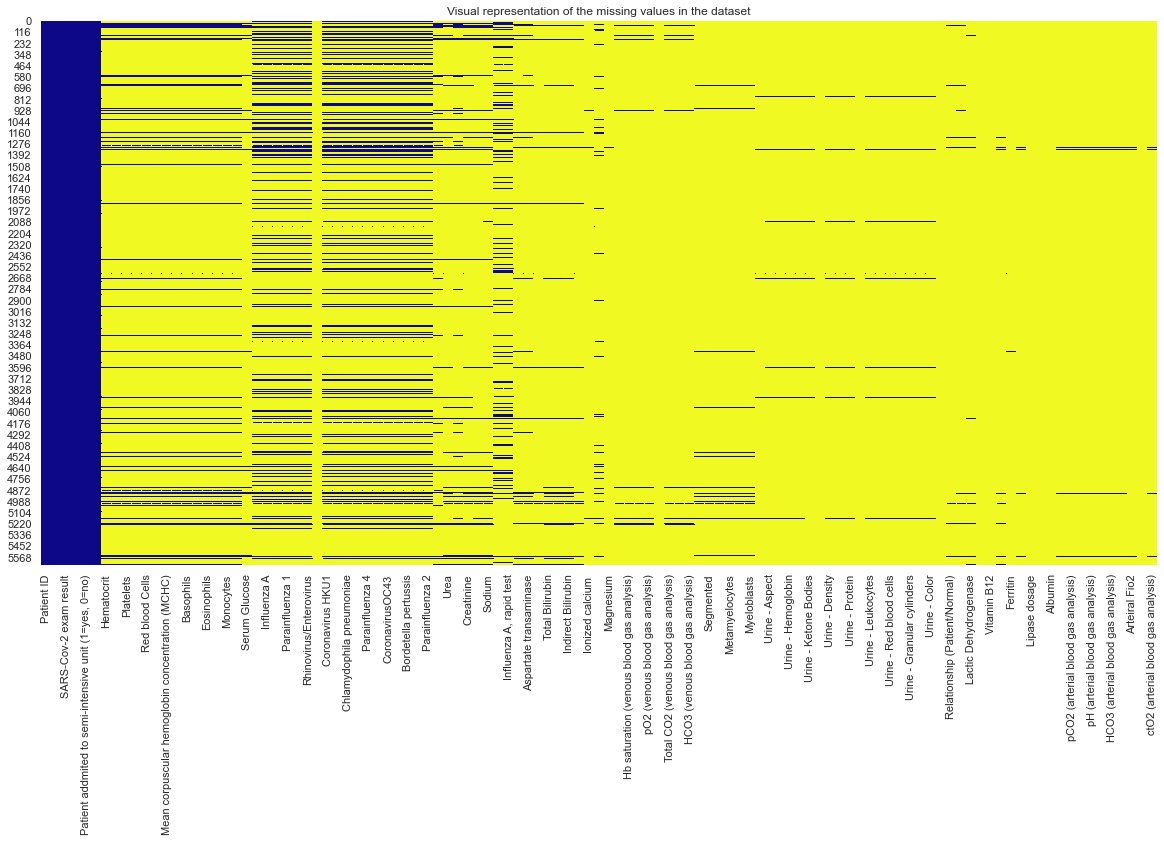

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False, cmap = 'plasma')
plt.title('Visual representation of the missing values in the dataset')

From this visual presentation of the dataset, we can see that almost the half of the dataset is empty (more than 90% of missing values). However, we can note that there are columns that contains the same amount of missing values. We will keep them for the analysis.

## Dataset cleaning

In [9]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]
df = df.drop('Patient ID', axis = 1)
df.shape

(5644, 38)

Text(0.5, 1.0, 'Visual representation of the missing values in the new dataset')

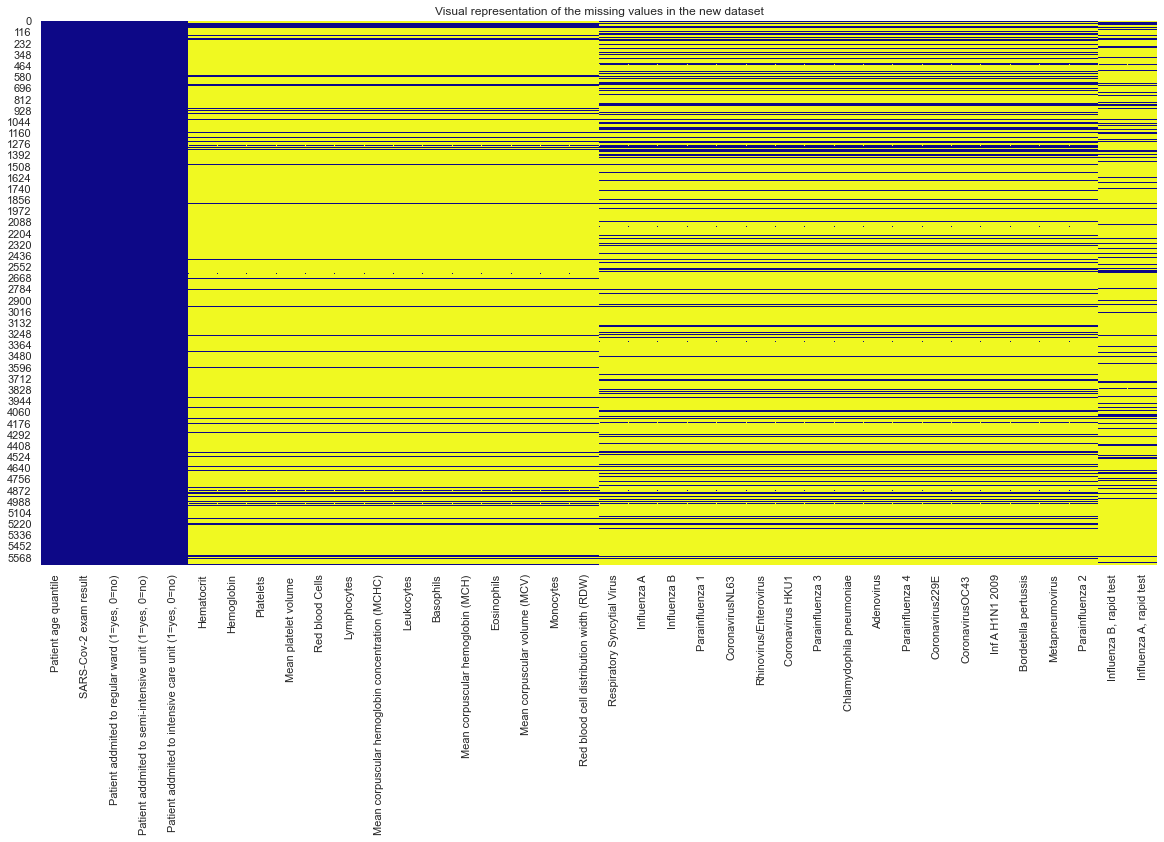

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False, cmap = 'plasma')
plt.title('Visual representation of the missing values in the new dataset')

## Analysis of the target: SARS-Cov-2 exam result

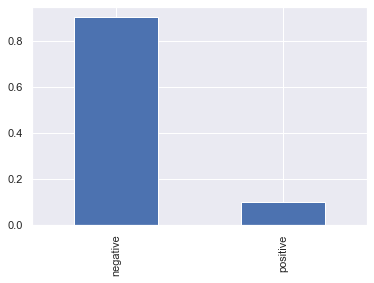

In [11]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True).plot(kind = 'bar')

## Analysis of the features
### Numerical features

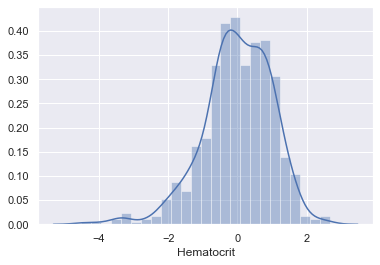

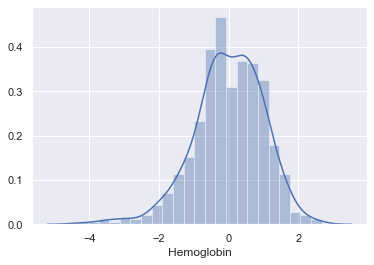

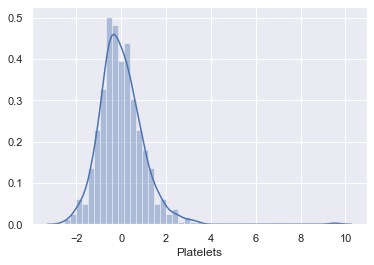

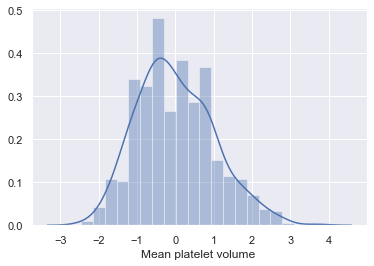

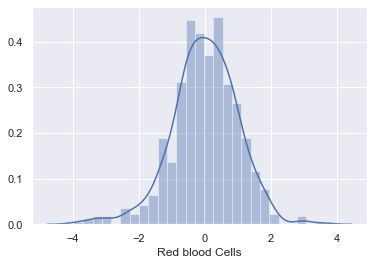

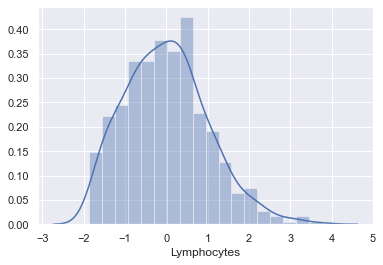

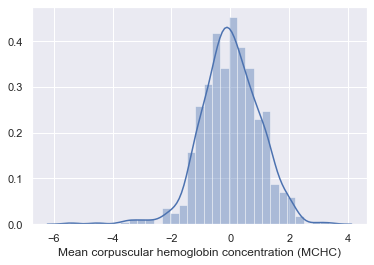

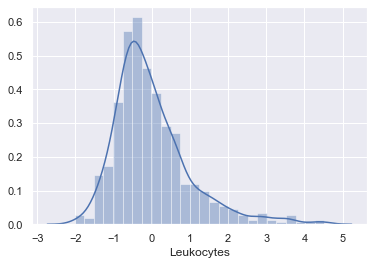

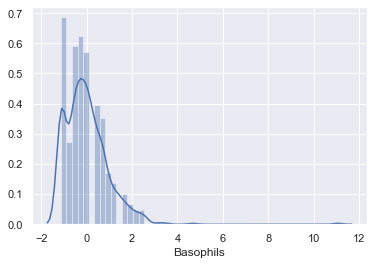

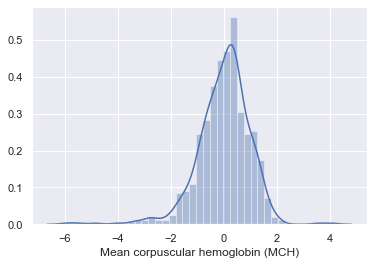

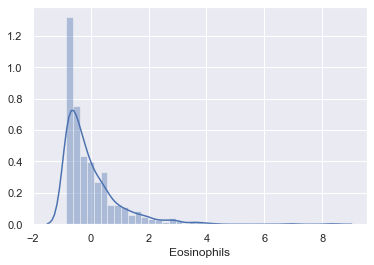

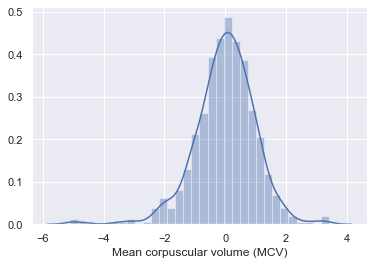

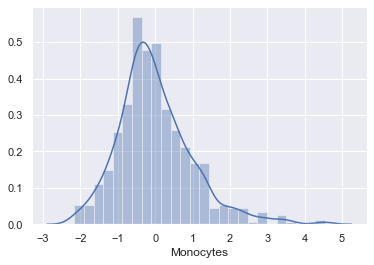

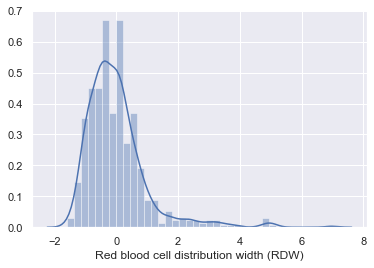

In [12]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

What we can see from these graphs:
- It seems like these features has already been standardized since their mean is 0 and std is 1.
- Some of them have normal distribution
- However, some are not symetric, maybe some outliers.

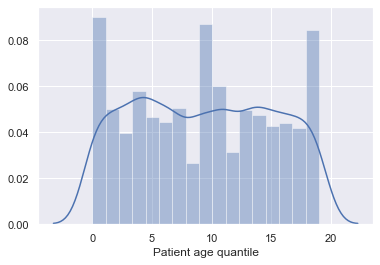

In [13]:
sns.distplot(df['Patient age quantile'])

this is weird representation for the age. Actually, the partients age were maybe splited into classes using a mathematical function. There are no information about this where we found the dataset.

### Categorical features

In [14]:
for col in df.select_dtypes('object'):
    print(f'{col :-<40}, {df[col].unique()}')

SARS-Cov-2 exam result------------------, ['negative' 'positive']
Respiratory Syncytial Virus-------------, [nan 'not_detected' 'detected']
Influenza A-----------------------------, [nan 'not_detected' 'detected']
Influenza B-----------------------------, [nan 'not_detected' 'detected']
Parainfluenza 1-------------------------, [nan 'not_detected' 'detected']
CoronavirusNL63-------------------------, [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus------------------, [nan 'detected' 'not_detected']
Coronavirus HKU1------------------------, [nan 'not_detected' 'detected']
Parainfluenza 3-------------------------, [nan 'not_detected' 'detected']
Chlamydophila pneumoniae----------------, [nan 'not_detected' 'detected']
Adenovirus------------------------------, [nan 'not_detected' 'detected']
Parainfluenza 4-------------------------, [nan 'not_detected' 'detected']
Coronavirus229E-------------------------, [nan 'not_detected' 'detected']
CoronavirusOC43-------------------------, [nan

these are all binary variables "detected" or "not detected" execpt for the column "Parainfluenza 2" that is useless since there are no detected patients in it.

let's now count the number of each of those variables

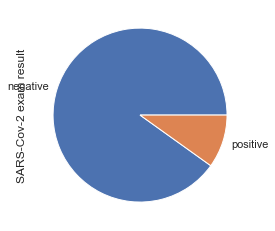

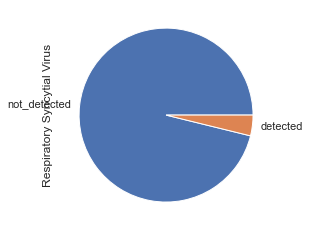

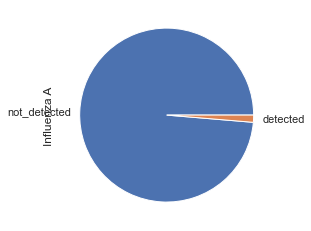

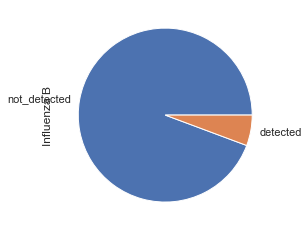

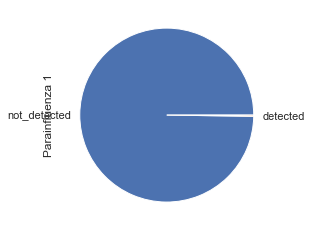

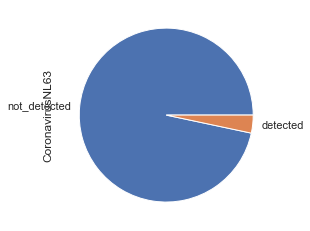

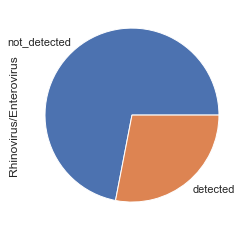

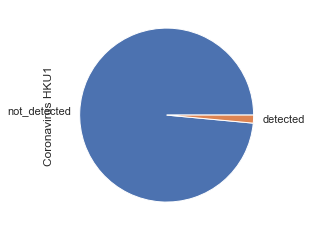

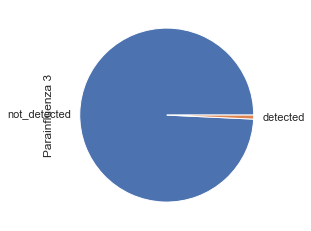

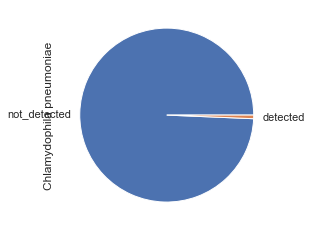

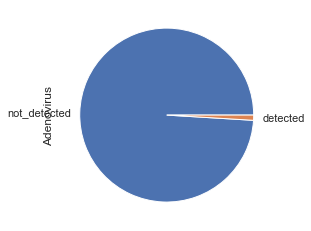

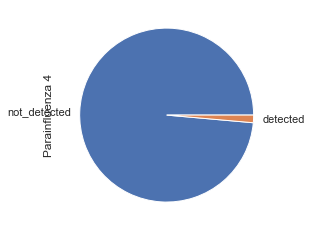

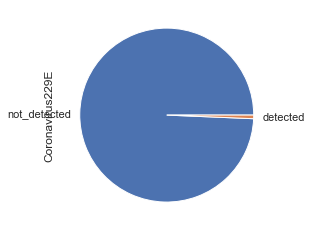

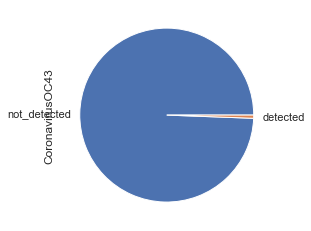

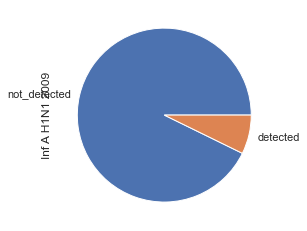

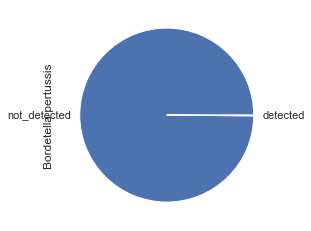

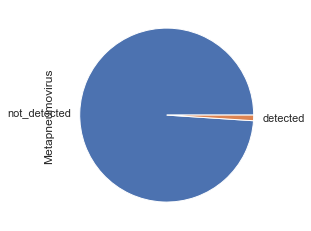

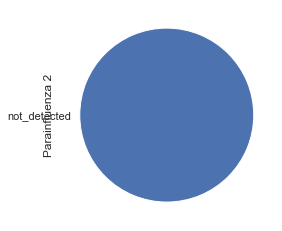

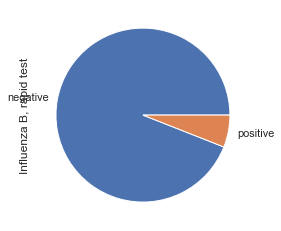

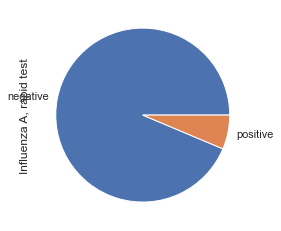

In [15]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot(kind = 'pie')

Ok so most of those columns don't have a high proportion of positives.
## Relation Target /variables
### Creation of dataframes based on target

In [16]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

### Creation of dataset for blood testing and viral testing
This will be easy to do since the blood testing columns and viral testing columns don't have the same amount of missing values and that we already calculated them.

In [17]:
missing_rate = df.isna().sum()/df.shape[0]
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate > 0.8)]
blood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

And we get only the blood testing columns here.

In [18]:
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

### Target with regard to Blood

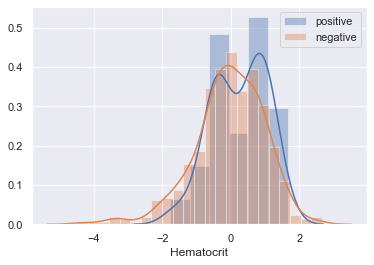

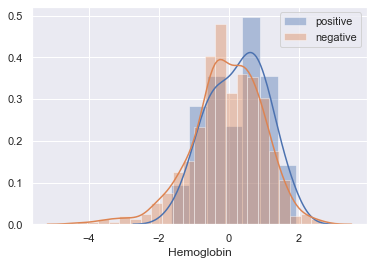

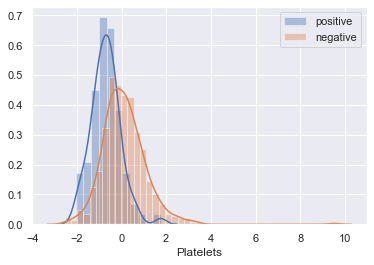

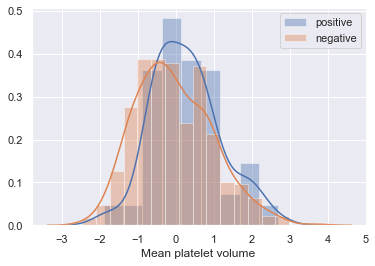

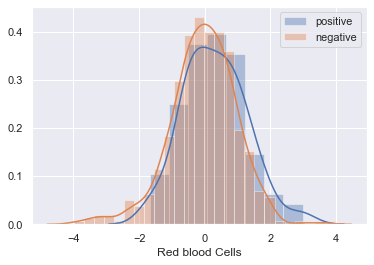

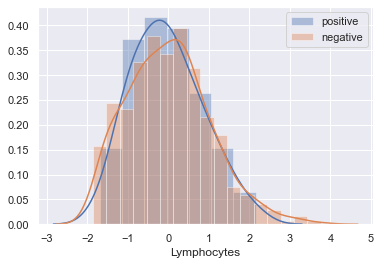

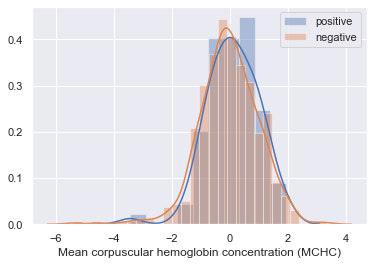

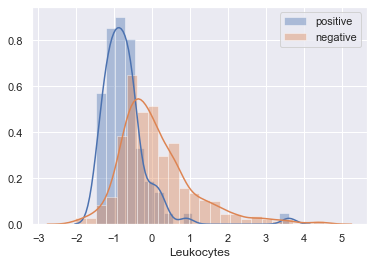

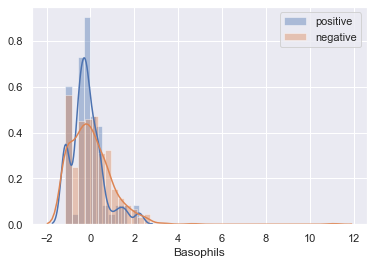

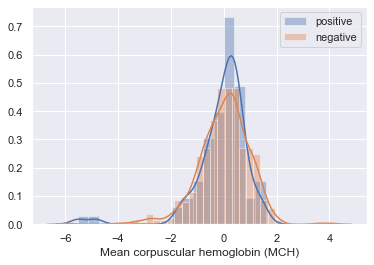

In [19]:
for col in blood_columns[0:10]:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

From this analysis, we can see that the amount of Monocytes, Platelets, Leukocytes might be linked to Covid_19 --> We need to test this hypothesis

### Target WRT Age

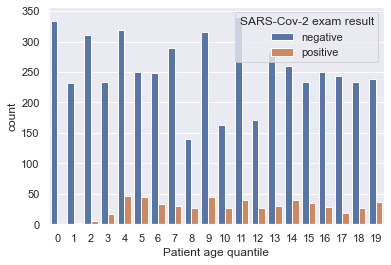

In [20]:
sns.countplot(x = 'Patient age quantile', hue = 'SARS-Cov-2 exam result', data=df)

According to the graph, it seems that the youngest patients won't be tested positive. But:
- We cannot make any assumptions since we don't know how this feature works.
- We know that even young patients can be tested positive.

### Target WRT categorical data (viral testing)

In [21]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A,detected,not_detected
SARS-Cov-2 exam result,,
negative,18,1224
positive,0,112


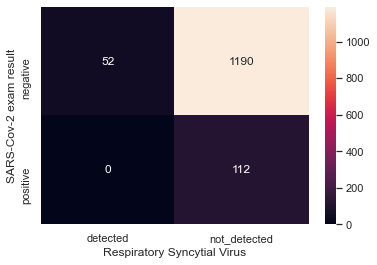

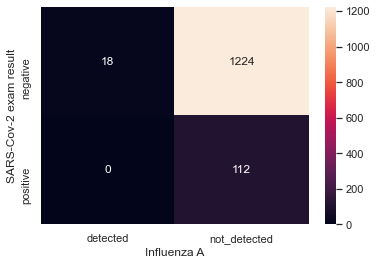

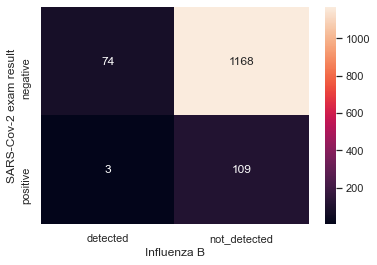

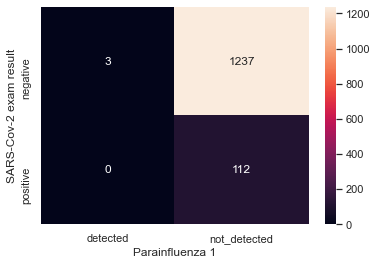

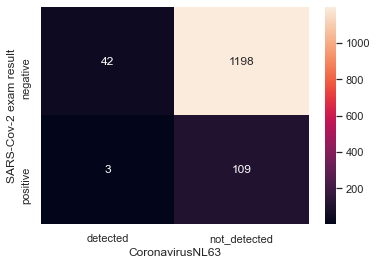

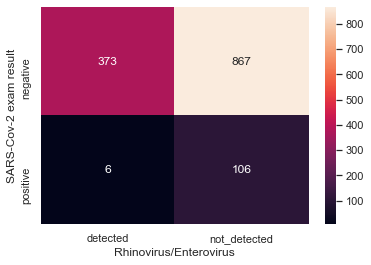

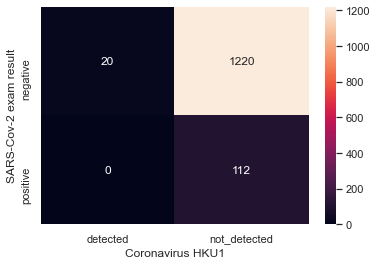

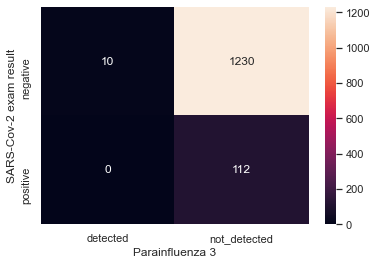

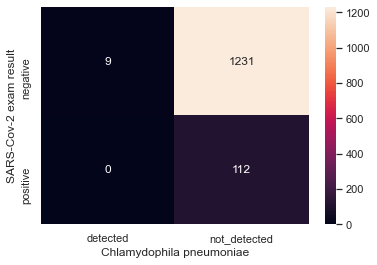

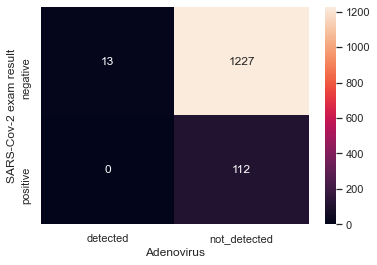

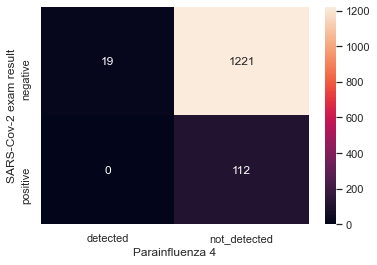

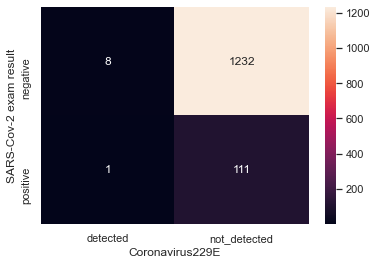

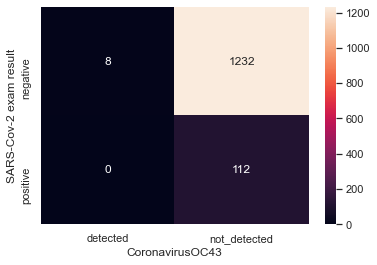

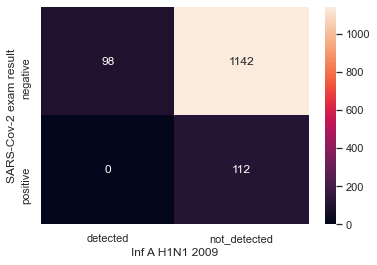

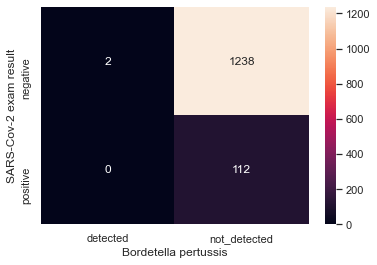

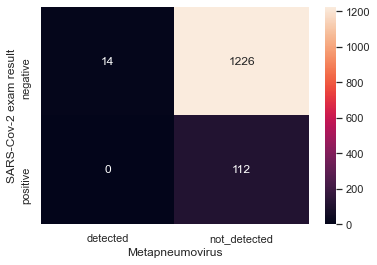

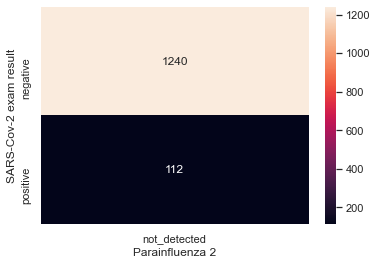

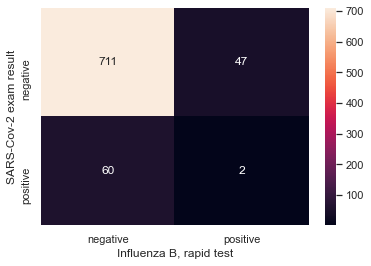

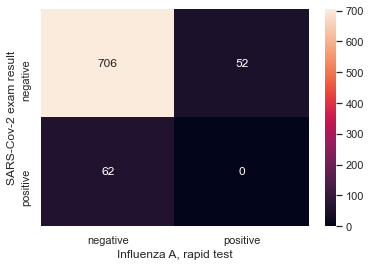

In [22]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')

Here we created a crosstab between the covid and every other virus. We can see that in the vast majority of these tables, very few patients where infected with both the Covid and another virus.